Naive Bayes Model Accuracy: 0.6043734994484459
              precision    recall  f1-score   support

           0       0.62      0.74      0.68     59879
           1       0.57      0.43      0.49     47998

    accuracy                           0.60    107877
   macro avg       0.60      0.59      0.58    107877
weighted avg       0.60      0.60      0.59    107877

Decision Tree Model Accuracy: 0.6231448779628651
              precision    recall  f1-score   support

           0       0.66      0.65      0.66     59879
           1       0.58      0.58      0.58     47998

    accuracy                           0.62    107877
   macro avg       0.62      0.62      0.62    107877
weighted avg       0.62      0.62      0.62    107877



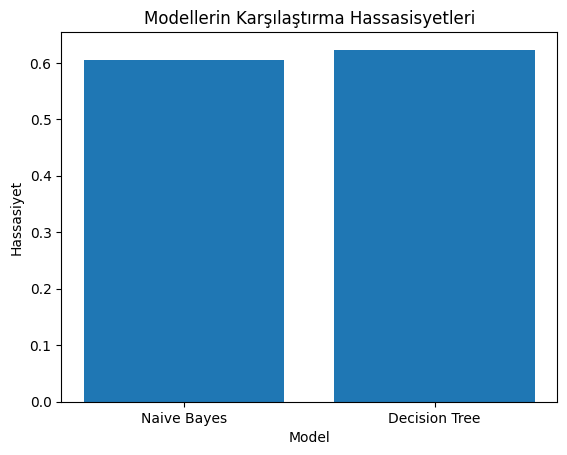

CPU times: total: 7.92 s
Wall time: 7.92 s


In [5]:
%%time
# Gerekli Kütüphaneleri İçe Aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Veri Setini Yükle ve Oku
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Veri Ön İşleme Adımı
data.dropna(inplace=True)

# Kategorik değişkenleri kodla
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Veriyi X (özellikler) ve y (hedef) olarak bölelim
X = data.drop('Delay', axis=1)
y = data['Delay']

# Veriyi Eğitim ve Test Kümelerine Ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellik Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes Model
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

# Naive Bayes Model Değerlendirme
y_pred_nb = model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print(f'Naive Bayes Model Accuracy: {accuracy_nb}')
print(report_nb)

# Decision Tree Model
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Decision Tree Model Değerlendirme
y_pred_dt = model_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print(f'Decision Tree Model Hassasiyeti: {accuracy_dt}')
print(report_dt)

# Bar grafiği ile Hassasiyeti kıyasla
labels = ['Naive Bayes', 'Decision Tree']
accuracies = [accuracy_nb, accuracy_dt]

plt.bar(labels, accuracies)
plt.xlabel('Model')
plt.ylabel('Hassasiyet')
plt.title('Modellerin Karşılaştırma Hassasisyetleri')
plt.show()
